In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('Vaccination Data.csv')

In [3]:
df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,22-02-2021,0.0,0.0,NaN,0.00,0.00,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,23-02-2021,NaN,NaN,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,24-02-2021,NaN,NaN,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,25-02-2021,NaN,NaN,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,26-02-2021,NaN,NaN,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
4260,Sri Lanka,18-03-2022,NaN,NaN,NaN,NaN,NaN,1832.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
4261,Sri Lanka,19-03-2022,NaN,NaN,NaN,NaN,NaN,1761.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
4262,Sri Lanka,20-03-2022,39061330.0,16990817.0,14374087.0,181.70,79.04,1830.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
4263,Sri Lanka,21-03-2022,39087900.0,16994196.0,14381844.0,181.83,79.05,1096.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


In [4]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [5]:
# Filter data for the specified countries
countries = ['China', 'India', 'Bangladesh', 'Pakistan', 'Russia', 'Indonesia', 'Japan', 'Philippines', 'Sri Lanka']
df_countries = df[df['country'].isin(countries)]

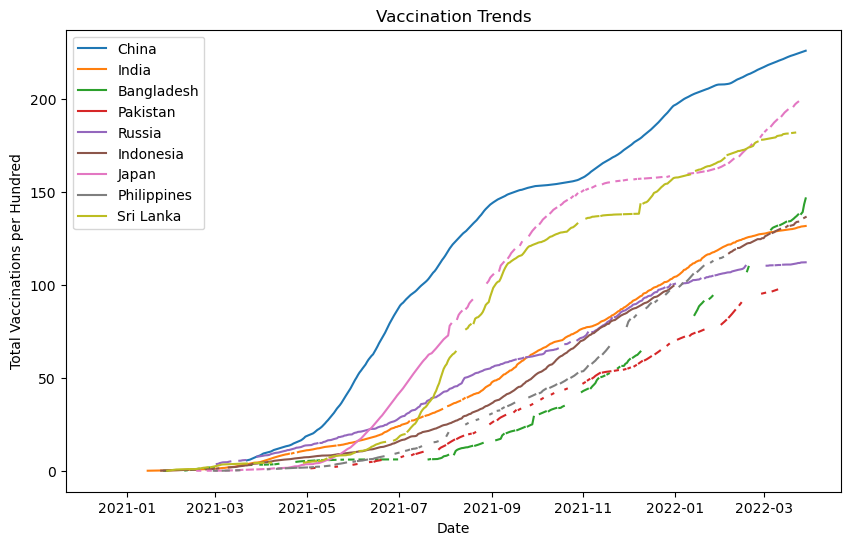

In [6]:
# Plot vaccination trends for each country
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_countries[df_countries['country'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations_per_hundred'], label=country)

plt.title('Vaccination Trends')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations per Hundred')
plt.legend()
plt.show()

In [17]:
# Comparison of vaccination progress among countries
latest_data = df_countries[df_countries['date'] == df_countries['date'].max()]
latest_data = latest_data[['country', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]
print("Latest Vaccination Data:")
print(latest_data)

Latest Vaccination Data:
          country  total_vaccinations  people_vaccinated  \
821    Bangladesh        2.436427e+08        127544055.0   
1291        China        3.263129e+09                NaN   
1730        India        1.834501e+09        984838143.0   
2172    Indonesia        3.771089e+08        196240871.0   
2578        Japan        2.543456e+08        102467506.0   
3375  Philippines        1.487991e+08                NaN   
3845       Russia        1.636012e+08         79954746.0   

      people_fully_vaccinated  
821               107712737.0  
1291                      NaN  
1730              828229455.0  
2172              158830466.0  
2578              100633737.0  
3375               65804988.0  
3845               72841232.0  


In [19]:
# Filter numeric columns for correlation analysis
numeric_columns = df_countries.select_dtypes(include=['float64', 'int64']).columns

# Correlation analysis
correlation_matrix = df_countries[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                total_vaccinations  people_vaccinated  \
total_vaccinations                        1.000000           0.981001   
people_vaccinated                         0.981001           1.000000   
people_fully_vaccinated                   0.987460           0.947016   
total_vaccinations_per_hundred            0.646312           0.374989   
people_vaccinated_per_hundred             0.456870           0.433444   
daily_vaccinations_per_million            0.161023           0.101903   

                                people_fully_vaccinated  \
total_vaccinations                             0.987460   
people_vaccinated                              0.947016   
people_fully_vaccinated                        1.000000   
total_vaccinations_per_hundred                 0.447175   
people_vaccinated_per_hundred                  0.456958   
daily_vaccinations_per_million                 0.049216   

                                total_vaccinations_per

In [29]:
# Impute missing values in features
imputer_features = SimpleImputer(strategy='mean')
X_imputed = imputer_features.fit_transform(X)

# Impute missing values in target variable
imputer_target = SimpleImputer(strategy='mean')
y_imputed = imputer_target.fit_transform(y.values.reshape(-1, 1)).ravel()

# Train-test split on imputed data
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_imputed, y_train_imputed)

# Predict
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.6465138829640083e+17
R-squared: 0.3570876932250112
